In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split

# Modelling
# Regressions
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Binning
import woeBinningPandas

# Create Unique ID
import uuid

<IPython.core.display.Javascript object>

Data: https://www.kaggle.com/wordsforthewise/lending-club

In [3]:
# Read data
accepted = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)
rejected = pd.read_csv("rejected_2007_to_2018Q4.csv", low_memory=False)

<IPython.core.display.Javascript object>

In [4]:
print(accepted.shape)
print(rejected.shape)

(2260701, 151)
(27648741, 9)


<IPython.core.display.Javascript object>

## Preprocessing

In [5]:
# Sample 100k obs. for easy processing
accepted_small = accepted.sample(n=25000, random_state=7)
accepted_small.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [6]:
# Create Default Flag
accepted_small["target"] = accepted_small["loan_status"].apply(
    lambda x: 1 if x == "Charged Off" else (0 if x == "Fully Paid" else 2)
)

<IPython.core.display.Javascript object>

In [7]:
# Remove Current and Missings
accepted_small = accepted_small.loc[accepted_small["target"] != 2]
accepted_small.shape

(14838, 152)

<IPython.core.display.Javascript object>

In [8]:
pd.crosstab(accepted_small["target"], accepted_small["loan_status"])

loan_status,Charged Off,Fully Paid
target,,
0,0,11809
1,3029,0


<IPython.core.display.Javascript object>

The dataset is imbalanced

## Bucketing

In [9]:
# Keep only 2 explanatory variables for quick an dirty PD model
df = accepted_small[["id", "target", "loan_amnt", "addr_state", "emp_length"]]

<IPython.core.display.Javascript object>

In [10]:
# State
binning_emp_length = woeBinningPandas.woe_binning(
    df, "target", "emp_length", 0.1, 0.1, 50, 100, "bad"
)
binning_emp_length

,Group_2,Group_1,woe,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
2,misc. level neg.,2 years,-11.550008,0.006977,3654,1052,0.309425,0.347309,0.004376
0,misc. level neg.,1 year,-11.550008,0.006977,3654,1052,0.309425,0.347309,0.004376
4,misc. level neg.,4 years,-11.550008,0.006977,3654,1052,0.309425,0.347309,0.004376
11,misc. level neg.,Missing,-11.550008,0.006977,3654,1052,0.309425,0.347309,0.004376
8,misc. level neg.,8 years,-11.550008,0.006977,3654,1052,0.309425,0.347309,0.004376
1,10+ years,10+ years,2.904113,0.006977,3857,961,0.326615,0.317266,0.000272
9,misc. level pos.,9 years,8.164703,0.006977,4298,1016,0.363960,0.335424,0.002330
7,misc. level pos.,7 years,8.164703,0.006977,4298,1016,0.363960,0.335424,0.002330
6,misc. level pos.,6 years,8.164703,0.006977,4298,1016,0.363960,0.335424,0.002330
5,misc. level pos.,5 years,8.164703,0.006977,4298,1016,0.363960,0.335424,0.002330


<IPython.core.display.Javascript object>

In [11]:
bademplen = binning_emp_length["Group_1"][:2].tolist()
nullemplen = binning_emp_length["Group_1"][2:].tolist()

<IPython.core.display.Javascript object>

In [12]:
# Emp Length
df["emp_length2"] = df["emp_length"].apply(
    lambda x: "1-2 years" if (x in nullemplen) else ">2 years"
)

<IPython.core.display.Javascript object>

In [13]:
# Loan Amount
df["loan_amnt2"] = df["loan_amnt"].apply(
    lambda x: "<=1k"
    if (x <= 1000)
    else ("1-10k" if (x > 1000 and x <= 10000) else ">10k")
)

<IPython.core.display.Javascript object>

In [14]:
# State
binning = woeBinningPandas.woe_binning(
    df, "target", "addr_state", 0.1, 0.1, 50, 100, "bad"
)
binning

,Group_2,Group_1,woe,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
37,misc. level neg.,PA,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
34,misc. level neg.,OH,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
26,misc. level neg.,NC,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
19,misc. level neg.,MD,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
30,misc. level neg.,NJ,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
14,misc. level neg.,IN,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
23,misc. level neg.,MO,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
32,misc. level neg.,NV,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
1,misc. level neg.,AL,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179
41,misc. level neg.,TN,-15.802180,0.024348,4880,1466,0.413244,0.483988,0.011179


<IPython.core.display.Javascript object>

In [15]:
badstates = binning["Group_1"][:25].tolist()
california = ["CA"]
goodstates = binning["Group_1"][27:].tolist()

<IPython.core.display.Javascript object>

In [16]:
df["addr_state2"] = df["addr_state"].apply(
    lambda x: "California"
    if (x == "CA")
    else ("Bad state" if (x in badstates) else "Good state")
)

<IPython.core.display.Javascript object>

In [17]:
df2 = df[["id", "target", "loan_amnt2", "addr_state2", "emp_length2"]]

<IPython.core.display.Javascript object>

In [18]:
# Function to apply the bucketing to any future dataset:


def binning(data):
    data["loan_amnt2"] = data["loan_amnt"].apply(
        lambda x: "<=1k"
        if (x <= 1000)
        else ("1-10k" if (x > 1000 and x <= 10000) else ">10k")
    )

    data["addr_state2"] = data["addr_state"].apply(
        lambda x: "California"
        if (x == "CA")
        else ("Bad state" if (x in badstates) else "Good state")
    )

    data["emp_length2"] = data["emp_length"].apply(
        lambda x: "1-2 years" if (x in nullemplen) else ">2 years"
    )

    data = data[["id", "loan_amnt2", "addr_state2", "emp_length2"]]
    return data

<IPython.core.display.Javascript object>

In [19]:
# Function to explore differentiation of bucketing visually + cross tab:


def diff_visual(data, variable):
    %matplotlib inline
    table = pd.crosstab(data[variable], df2["target"])
    table.div(table.sum(1).astype(float), axis=0).plot(
        kind="bar", color=["cadetblue", "crimson"], stacked=True
    )
    plt.title("Stacked Bar Loan Amount vs Default Status")
    # plt.xlabel(variable)
    plt.ylabel("Proportion of Accepts")

    x = pd.crosstab(data[variable], df2["target"]).apply(lambda r: r / r.sum(), axis=1)
    x = pd.DataFrame(x)

    return x

<IPython.core.display.Javascript object>

target,0,1
loan_amnt2,,
1-10k,0.823922,0.176078
<=1k,0.892308,0.107692
>10k,0.775151,0.224849


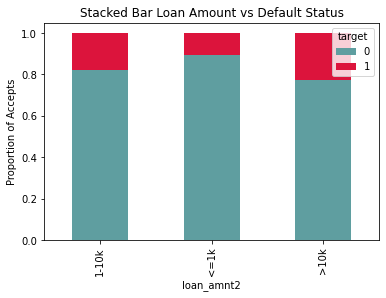

<IPython.core.display.Javascript object>

In [20]:
diff_visual(df2, "loan_amnt2")

target,0,1
emp_length2,,
1-2 years,0.801798,0.198202
>2 years,0.773908,0.226092


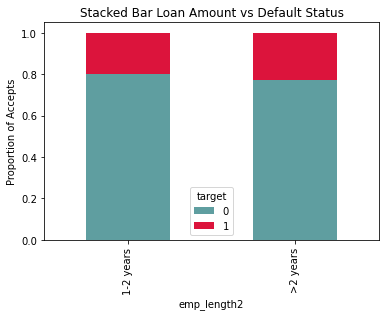

<IPython.core.display.Javascript object>

In [21]:
diff_visual(df2, "emp_length2")

target,0,1
addr_state2,,
Bad state,0.779883,0.220117
California,0.793533,0.206467
Good state,0.823040,0.176960


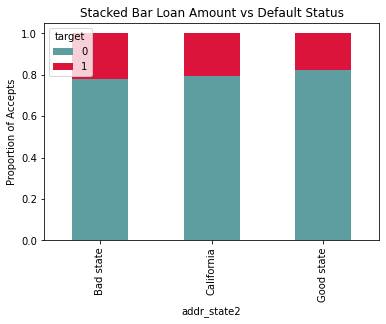

<IPython.core.display.Javascript object>

In [22]:
diff_visual(df2, "addr_state2")

In [23]:
# One hot encoding
modelling_variables = ["target", "loan_amnt2", "addr_state2", "emp_length2"]

for i in modelling_variables:
    if i != "target":
        df2 = df2.join(pd.get_dummies(df2[i]))
        df2 = df2.drop([i], axis=1)

<IPython.core.display.Javascript object>

In [24]:
# Drop Null Band
df3 = df2.drop(columns=["1-10k", "California", ">2 years"])

<IPython.core.display.Javascript object>

In [25]:
X = df3.loc[:, df3.columns != "target"]
y = df3.loc[:, df3.columns == "target"]

<IPython.core.display.Javascript object>

In [26]:
# Balance the data
os = RandomUnderSampler(sampling_strategy=0.5, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
columns = X_train.columns

<IPython.core.display.Javascript object>

In [27]:
# Train
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=["target"])

# we can check the numbers of our data
print(
    "The number of observations in Development data before undersampling is ",
    len(X_train),
)
print(
    "The number of observations in Development data after undersampling is ",
    len(os_data_X),
)

The number of observations in Development data before undersampling is  10386
The number of observations in Development data after undersampling is  6357


<IPython.core.display.Javascript object>

In [28]:
# Keep only columns for modelling
os_data_X_2 = os_data_X[["<=1k", "Good state", "Bad state", "1-2 years"]]
X_test_2 = X_test[["<=1k", "Good state", "Bad state", "1-2 years"]]

<IPython.core.display.Javascript object>

In [29]:
# Build Logistic regression
# Statmodels
logit_model = sm.Logit(os_data_y, os_data_X_2.astype(float))
result3 = logit_model.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.636690
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.000   
Dependent Variable: target           AIC:              8102.8742
Date:               2020-11-08 18:03 BIC:              8129.9035
No. Observations:   6357             Log-Likelihood:   -4047.4  
Df Model:           3                LL-Null:          -4046.3  
Df Residuals:       6353             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
<=1k         -1.0969    0.6299  -1.7413  0.0816  -2.3316   0.1377
Good state   -0.5554    0.0618  -8.9863  0.0000  -0.6766  -0.4343
Bad stat

<IPython.core.display.Javascript object>

Accuracy score Logistic Regression: 0.7955974842767296


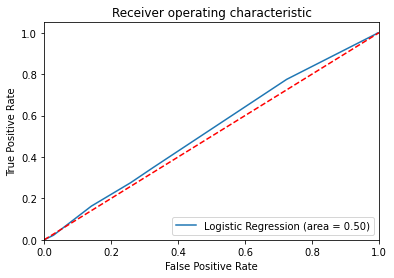

<IPython.core.display.Javascript object>

In [30]:
# Sklearn
logreg = LogisticRegression(fit_intercept=False, penalty="none")
logreg.fit(os_data_X_2, os_data_y.values.ravel())
y_pred = logreg.predict(X_test_2)
print("Accuracy score Logistic Regression:", logreg.score(X_test_2, y_test))
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_2))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_2)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

In [31]:
#Test set with labels
test_labels = pd.merge(
    y_test,
    X_test,
    how="inner",
    left_index=True,
    right_index=True,
)


<IPython.core.display.Javascript object>

In [32]:
# Predictions on testset
test_pred = logreg.predict_proba(X_test_2)[:, 1]
test_pred2 = pd.DataFrame(data=test_pred, columns=["prediction"])
test_pred2["count"] = test_pred2.groupby("prediction")["prediction"].transform("count")
test_pred2.groupby(["prediction"]).count()

,count
prediction,
0.110538,5
0.144464,13
0.160783,4
0.178020,3
0.206549,4
0.271253,1153
0.335878,1807
0.364605,297
0.393448,519


<IPython.core.display.Javascript object>

In [33]:
# Join predictions with test new
pred_test_kgb = pd.DataFrame(
    data=test_pred, columns=["prediction_beforeRI"], index=y_test.index.copy()
)
pred_test1 = pd.merge(
    test_labels,
    pred_test_kgb[["prediction_beforeRI"]],
    how="inner",
    left_index=True,
    right_index=True,
)

# pred_test1.dropna(subset=["prediction_beforeRI"], inplace=True)
pred_test1

,target,id,<=1k,>10k,Bad state,Good state,1-2 years,prediction_beforeRI
11341,0,26789777,0,1,0,0,1,0.393448
3076,1,17894572,0,1,0,0,1,0.393448
10395,0,34773392,0,1,0,0,1,0.393448
15834,0,1122926,0,1,0,1,1,0.271253
1317,0,46774382,0,1,1,0,1,0.335878
...,...,...,...,...,...,...,...,...
10236,0,98857570,0,1,0,1,1,0.271253
6184,1,94467429,0,1,1,0,0,0.438100
13619,1,124747082,0,1,1,0,0,0.438100
4441,1,49673413,0,1,1,0,1,0.335878


<IPython.core.display.Javascript object>

In [34]:
pred_test1.shape  # Expected nr. of observations

(4452, 8)

<IPython.core.display.Javascript object>

## Apply the KGB Model (Logistic Regression) to the Rejects

In [35]:
# Sampling
rejected_small = rejected.sample(n=25000, random_state=7)
rejected_small.reset_index(drop=True, inplace=True)
rejected_small.rename(columns={"Amount Requested": "loan_amnt"}, inplace=True)
rejected_small.rename(columns={"Employment Length": "emp_length_new"}, inplace=True)
rejected_small.rename(columns={"State": "addr_state"}, inplace=True)
dfr = rejected_small[["loan_amnt", "addr_state", "emp_length_new"]]

<IPython.core.display.Javascript object>

In [36]:
# Create unique id for the rejects (to facilitate merge later)
dfr["id"] = dfr.index.to_series().map(lambda x: uuid.uuid4())

<IPython.core.display.Javascript object>

In [37]:
# Map values of emp. length of accepts to the rejects
dfr["emp_length"] = dfr["emp_length_new"].apply(
    lambda x: "< 1 year"  # match name
    if (x == "1 year" or x == "< 1 year" or x == "2 years")
    else ">2 years"
)
del dfr["emp_length_new"]

<IPython.core.display.Javascript object>

In [38]:
# Train/Test Split (without labels)

# Shuffle the dataset
shuffle_df = dfr.sample(frac=1)

# Define a size for your train set
train_size = int(0.7 * len(shuffle_df))

# Split your dataset
dfr_dev = shuffle_df[:train_size]
dfr_test = shuffle_df[train_size:]

<IPython.core.display.Javascript object>

In [39]:
# Bucketing Train set (based on the custom function)
binning(dfr_dev)

,id,loan_amnt2,addr_state2,emp_length2
10171,e7c5e9a0-a647-4b48-966a-b3cb95a76b19,1-10k,Bad state,1-2 years
7346,ab919792-0c15-4fc1-9ec3-bcf1629e84ac,>10k,Bad state,1-2 years
21944,a0172b06-8488-4445-9f10-c2e5262b6f7b,>10k,California,>2 years
15349,474d502a-a041-4f69-91f4-b01fb6d79825,1-10k,Bad state,1-2 years
19067,5b404e41-1f77-4ff0-a1c7-b87455442b1b,>10k,Bad state,1-2 years
...,...,...,...,...
13981,5b4913cb-6513-423b-9389-e53f822f39cc,1-10k,Bad state,1-2 years
5170,1756ba5b-f2ee-4190-8318-50a9e585108c,1-10k,Bad state,1-2 years
1391,6c760a11-c818-48dd-ad75-2272add6c918,>10k,Good state,>2 years
11865,b83e806e-b936-443d-8875-a3ea56691249,>10k,Bad state,1-2 years


<IPython.core.display.Javascript object>

In [40]:
# One hot encoding
modelling_variables = ["target", "loan_amnt2", "addr_state2", "emp_length2"]

for i in modelling_variables:
    if i != "target":
        dfr_dev = dfr_dev.join(pd.get_dummies(dfr_dev[i]))
        dfr_dev = dfr_dev.drop([i], axis=1)

<IPython.core.display.Javascript object>

In [41]:
# Drop Null Band
dfr_dev2 = dfr_dev.drop(
    columns=[
        "loan_amnt",
        "addr_state",
        "emp_length",
        "1-10k",
        "California",
        ">2 years",
    ]
)

<IPython.core.display.Javascript object>

In [42]:
# Bucketing (based on a custom function)
binning(dfr_test)

,id,loan_amnt2,addr_state2,emp_length2
23730,df3016fa-15ad-4856-9b08-feaf82ea42f3,1-10k,Bad state,1-2 years
22044,0f9f3a47-32b3-48b8-bbaa-e636dc0c73b6,1-10k,Bad state,1-2 years
5475,0104ccdc-69a7-40d4-b595-574ed9218b02,<=1k,Bad state,1-2 years
5596,9b6324db-6f63-4bd1-9b20-ee8af64255fe,>10k,Bad state,>2 years
17072,6fa2d389-a429-411c-9604-ef5f60808864,1-10k,Good state,1-2 years
...,...,...,...,...
110,fad0468c-98d5-4deb-a277-0a57ac4bc4d8,1-10k,Bad state,1-2 years
15195,dd9dabad-6725-4833-a74a-3202e9ef3b87,1-10k,Good state,1-2 years
13546,d2faa9a6-c09b-4d89-99c7-3efdad7b279c,>10k,Good state,1-2 years
8408,f2f73460-ed93-4cfa-ab35-c7df19a4e57c,>10k,Bad state,1-2 years


<IPython.core.display.Javascript object>

In [43]:
# One hot encoding
modelling_variables = ["target", "loan_amnt2", "addr_state2", "emp_length2"]

for i in modelling_variables:
    if i != "target":
        dfr_test = dfr_test.join(pd.get_dummies(dfr_test[i]))
        dfr_test = dfr_test.drop([i], axis=1)

<IPython.core.display.Javascript object>

In [44]:
# Drop Null Band
dfr_test2 = dfr_test.drop(
    columns=["loan_amnt", "addr_state", "emp_length", "1-10k", "California", ">2 years"]
)

<IPython.core.display.Javascript object>

In [45]:
dfr_test

,loan_amnt,addr_state,id,emp_length,1-10k,<=1k,>10k,Bad state,California,Good state,1-2 years,>2 years
23730,8000.0,OK,df3016fa-15ad-4856-9b08-feaf82ea42f3,< 1 year,1,0,0,1,0,0,1,0
22044,2500.0,MS,0f9f3a47-32b3-48b8-bbaa-e636dc0c73b6,< 1 year,1,0,0,1,0,0,1,0
5475,1000.0,FL,0104ccdc-69a7-40d4-b595-574ed9218b02,< 1 year,0,1,0,1,0,0,1,0
5596,21850.0,MD,9b6324db-6f63-4bd1-9b20-ee8af64255fe,>2 years,0,0,1,1,0,0,0,1
17072,5000.0,MN,6fa2d389-a429-411c-9604-ef5f60808864,< 1 year,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110,10000.0,IL,fad0468c-98d5-4deb-a277-0a57ac4bc4d8,< 1 year,1,0,0,1,0,0,1,0
15195,3000.0,TX,dd9dabad-6725-4833-a74a-3202e9ef3b87,< 1 year,1,0,0,0,0,1,1,0
13546,22000.0,TX,d2faa9a6-c09b-4d89-99c7-3efdad7b279c,< 1 year,0,0,1,0,0,1,1,0
8408,12000.0,IL,f2f73460-ed93-4cfa-ab35-c7df19a4e57c,< 1 year,0,0,1,1,0,0,1,0


<IPython.core.display.Javascript object>

In [46]:
dfr_dev3 = dfr_dev2[["<=1k", "Bad state", "Good state", "1-2 years"]]
dfr_test3 = dfr_test2[["<=1k", "Bad state", "Good state", "1-2 years"]]

<IPython.core.display.Javascript object>

In [47]:
# Predictions
rej_test_predictions = logreg.predict_proba(dfr_dev3)[:, 1]
df_pred_rej = pd.DataFrame(
    data=rej_test_predictions,
    columns=["prediction_beforeRI"],
    index=dfr_dev2.index.copy(),
)
df_pred_rej["Rejects"] = df_pred_rej.groupby("prediction_beforeRI")[
    "prediction_beforeRI"
].transform("count")
df_pred_rej.groupby(["prediction_beforeRI"]).count()

,Rejects
prediction_beforeRI,
0.110538,554
0.144464,312
0.160783,124
0.178020,90
0.206549,69
0.250306,25
0.271253,8056
0.335878,4280
0.364605,1387


<IPython.core.display.Javascript object>

### Reject Inference: Simple Augmentation (arbitrary cutoff 0.3)

In [48]:
# Join predictions with train new
pred_ri = logreg.predict_proba(dfr_dev3)[:, 1]
pred_ri1 = pd.DataFrame(
    data=pred_ri,
    columns=["prediction2"],
    index=dfr_dev2.index.copy(),
)
pred_ri1["prediction_beforeRI"] = pred_ri1["prediction2"].apply(
    lambda x: 0 if (x < 0.3) else 1
)
ri1 = pd.merge(
    dfr_dev2,
    pred_ri1[["prediction_beforeRI"]],
    how="inner",
    left_index=True,
    right_index=True,
)
# pred_test1.dropna(subset=["prediction_beforeRI"], inplace=True)
ri1_train = ri1[["id", "prediction_beforeRI"]]
ri1_train

,id,prediction_beforeRI
10171,e7c5e9a0-a647-4b48-966a-b3cb95a76b19,0
7346,ab919792-0c15-4fc1-9ec3-bcf1629e84ac,0
21944,a0172b06-8488-4445-9f10-c2e5262b6f7b,1
15349,474d502a-a041-4f69-91f4-b01fb6d79825,0
19067,5b404e41-1f77-4ff0-a1c7-b87455442b1b,0
...,...,...
13981,5b4913cb-6513-423b-9389-e53f822f39cc,0
5170,1756ba5b-f2ee-4190-8318-50a9e585108c,0
1391,6c760a11-c818-48dd-ad75-2272add6c918,1
11865,b83e806e-b936-443d-8875-a3ea56691249,0


<IPython.core.display.Javascript object>

### K-Means

to-do:
- grid search/hypterparameter optimization
- visualization

In [49]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=7)

<IPython.core.display.Javascript object>

In [50]:
kmodel = kmeans.fit(dfr_dev3)

<IPython.core.display.Javascript object>

In [51]:
kmeans.inertia_

4980.756463481785

<IPython.core.display.Javascript object>

In [52]:
kmeans.cluster_centers_

array([[ 7.09893795e-02,  9.43689571e-15,  1.00000000e+00,
         8.55599031e-01],
       [ 6.53589384e-02,  8.34171268e-01, -4.99600361e-15,
         8.50325558e-01]])

<IPython.core.display.Javascript object>

In [53]:
kmeans.n_iter_

3

<IPython.core.display.Javascript object>

In [54]:
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 0])

<IPython.core.display.Javascript object>

### Reject Inference K-means

### Train set

In [55]:
# Predictions
rej_test_predictions_kmeans = kmeans.labels_
df_pred_rej_kmeans = pd.DataFrame(
    data=rej_test_predictions_kmeans, columns=["prediction"]
)
df_pred_rej_kmeans["Rejects"] = df_pred_rej_kmeans.groupby("prediction")[
    "prediction"
].transform("count")
df_pred_rej_kmeans.groupby(["prediction"]).count()

,Rejects
prediction,
0,5367
1,12133


<IPython.core.display.Javascript object>

In [56]:
# Join predictions with train new
pred_ri = kmeans.labels_
pred_ri2 = pd.DataFrame(
    data=pred_ri, columns=["prediction_beforeRI"], index=dfr_dev2.index.copy()
)
ri2 = pd.merge(
    dfr_dev2,
    pred_ri2[["prediction_beforeRI"]],
    how="inner",
    left_index=True,
    right_index=True,
)
# pred_test1.dropna(subset=["prediction_beforeRI"], inplace=True)
ri2_train = ri2[["id", "prediction_beforeRI"]]
ri2_train

,id,prediction_beforeRI
10171,e7c5e9a0-a647-4b48-966a-b3cb95a76b19,1
7346,ab919792-0c15-4fc1-9ec3-bcf1629e84ac,1
21944,a0172b06-8488-4445-9f10-c2e5262b6f7b,1
15349,474d502a-a041-4f69-91f4-b01fb6d79825,1
19067,5b404e41-1f77-4ff0-a1c7-b87455442b1b,1
...,...,...
13981,5b4913cb-6513-423b-9389-e53f822f39cc,1
5170,1756ba5b-f2ee-4190-8318-50a9e585108c,1
1391,6c760a11-c818-48dd-ad75-2272add6c918,0
11865,b83e806e-b936-443d-8875-a3ea56691249,1


<IPython.core.display.Javascript object>

### Test Set

In [57]:
# Predictions
rej_test_predictions_kmeans2 = kmeans.predict(dfr_test3)
df_pred_rej_kmeans2 = pd.DataFrame(
    data=rej_test_predictions_kmeans2,
    columns=["prediction"],
    index=dfr_test2.index.copy(),
)
df_pred_rej_kmeans2["Rejects"] = df_pred_rej_kmeans2.groupby("prediction")[
    "prediction"
].transform("count")
df_pred_rej_kmeans2.groupby(["prediction"]).count()

,Rejects
prediction,
0,2356
1,5144


<IPython.core.display.Javascript object>

In [58]:
# Join predictions with test new
pred_test_ri = kmeans.predict(dfr_test3)
pred_test_ri2 = pd.DataFrame(
    data=pred_test_ri, columns=["prediction_beforeRI"], index=dfr_test2.index.copy()
)
ri2_testing = pd.merge(
    dfr_test2,
    pred_test_ri2[["prediction_beforeRI"]],
    how="inner",
    left_index=True,
    right_index=True,
)
# pred_test1.dropna(subset=["prediction_beforeRI"], inplace=True)
ri2_test = ri2_testing[["id", "prediction_beforeRI"]]
ri2_test

,id,prediction_beforeRI
23730,df3016fa-15ad-4856-9b08-feaf82ea42f3,1
22044,0f9f3a47-32b3-48b8-bbaa-e636dc0c73b6,1
5475,0104ccdc-69a7-40d4-b595-574ed9218b02,1
5596,9b6324db-6f63-4bd1-9b20-ee8af64255fe,1
17072,6fa2d389-a429-411c-9604-ef5f60808864,0
...,...,...
110,fad0468c-98d5-4deb-a277-0a57ac4bc4d8,1
15195,dd9dabad-6725-4833-a74a-3202e9ef3b87,0
13546,d2faa9a6-c09b-4d89-99c7-3efdad7b279c,0
8408,f2f73460-ed93-4cfa-ab35-c7df19a4e57c,1


<IPython.core.display.Javascript object>

### Hierarchical Clustering

In [59]:
cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
cluster.fit_predict(dfr_dev3)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

In [60]:
# Predictions
rej_test_predictions_aggl = cluster.labels_
df_pred_rej_aggl = pd.DataFrame(data=rej_test_predictions_aggl, columns=["prediction"])
df_pred_rej_aggl["Rejects"] = df_pred_rej_aggl.groupby("prediction")[
    "prediction"
].transform("count")
df_pred_rej_aggl.groupby(["prediction"]).count()

,Rejects
prediction,
0,8057
1,9443


<IPython.core.display.Javascript object>

In [84]:
# Join predictions with train new
pred_ri_aggl = cluster.labels_
pred_ri_aggl2 = pd.DataFrame(
    data=pred_ri_aggl,
    columns=["prediction_beforeRI"],
    index=dfr_dev2.index.copy(),
)
ri3 = pd.merge(
    dfr_dev2,
    pred_ri_aggl2[["prediction_beforeRI"]],
    how="inner",
    left_index=True,
    right_index=True,
)
# pred_test1.dropna(subset=["prediction_beforeRI"], inplace=True)
ri3_train = ri3[["id", "prediction_beforeRI"]]
ri3_train

,id,prediction_beforeRI
10171,e7c5e9a0-a647-4b48-966a-b3cb95a76b19,1
7346,ab919792-0c15-4fc1-9ec3-bcf1629e84ac,1
21944,a0172b06-8488-4445-9f10-c2e5262b6f7b,0
15349,474d502a-a041-4f69-91f4-b01fb6d79825,1
19067,5b404e41-1f77-4ff0-a1c7-b87455442b1b,1
...,...,...
13981,5b4913cb-6513-423b-9389-e53f822f39cc,1
5170,1756ba5b-f2ee-4190-8318-50a9e585108c,1
1391,6c760a11-c818-48dd-ad75-2272add6c918,0
11865,b83e806e-b936-443d-8875-a3ea56691249,1


<IPython.core.display.Javascript object>

### Evaluation Measures (with R2 for now)

In [80]:
def evaluation(ri_data):  # ri1_train, ri2_train, etc..

    # TRAIN NEW
    # Join labels to train set
    # Accepts
    train_accepts = pd.merge(
        os_data_X, os_data_y[["target"]], how="left", left_index=True, right_index=True
    )

    train_accepts["Flag1"] = "Accept"

    # Rejects
    train_rejects = pd.merge(
        dfr_dev2,
        ri_data[["prediction_beforeRI"]],
        how="left",
        left_index=True,
        right_index=True,
    )

    # Drop Null values and align naming
    train_accepts.dropna(subset=["target"], inplace=True)
    train_rejects.rename(columns={"prediction_beforeRI": "target"}, inplace=True)

    # Concatenate Train Accepts and Train Rejects
    train_new = pd.concat([train_accepts, train_rejects])

    # Retrain KGB Model

    # Split
    X_new = train_new.loc[:, train_new.columns != "target"]
    X_new = X_new.loc[:, X_new.columns != "Flag"]
    y_new = train_new.loc[:, train_new.columns == "target"]
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
        X_new, y_new, test_size=0.3, random_state=7
    )

    # Keep only columns for modelling
    os_data_X_2_new = X_train_new[["<=1k", "Good state", "Bad state", "1-2 years"]]
    X_test_2_new = X_test_new[["<=1k", "Good state", "Bad state", "1-2 years"]]

    # Build Logistic regression
    logreg = LogisticRegression(fit_intercept=False, penalty="none")
    logreg.fit(os_data_X_2_new, y_train_new.values.ravel())

    # TEST NEW
    # Join labels to test set
    # Accepts
    test_accepts = pd.merge(
        X_test, y_test[["target"]], how="left", left_index=True, right_index=True
    )

    test_accepts["Flag1"] = "Accept"

    # Rejects
    test_rejects = pd.merge(
        dfr_test2,
        ri2_test[["prediction_beforeRI"]],
        how="left",
        left_index=True,
        right_index=True,
    )

    # Drop Null values and align naming
    test_accepts.dropna(subset=["target"], inplace=True)
    test_rejects.rename(columns={"prediction_beforeRI": "target"}, inplace=True)
    test_rejects.dropna(subset=["target"], inplace=True)

    # Concatenate Test Accepts and Test Rejects
    test_new = pd.concat([test_accepts, test_rejects])

    # Flag
    test_new["Flag"] = test_new["Flag1"].apply(
        lambda x: "Accept" if x == "Accept" else "Reject"
    )
    test_new = test_new.drop(columns=["Flag1"])

    test_new = test_new.reset_index(drop=True)

    X_test_new = test_new.loc[:, train_new.columns != "target"]
    X_test_new2 = X_test_new.loc[:, X_test_new.columns != "Flag"]
    X_test_new3 = X_test_new2.loc[:, X_test_new2.columns != "id"]
    X_test_new4 = X_test_new3.loc[:, X_test_new3.columns != ">10k"]
    y_test_new = test_new.loc[:, train_new.columns == "target"]

    # PREDICTIONS
    # Join predictions with test new
    test_new_pred = logreg.predict_proba(X_test_new4)[:, 1]
    pred_test_df = pd.DataFrame(
        data=test_new_pred, columns=["prediction_afterRI"], index=test_new.index.copy()
    )
    pred_test = pd.merge(
        test_new,
        pred_test_df[["prediction_afterRI"]],
        how="inner",
        left_index=True,
        right_index=True,
    )
    # pred_test1.dropna(subset=["prediction_beforeRI"], inplace=True)
    pred_test

    a1 = pred_test1[["id", "target", "prediction_beforeRI"]]
    a2 = pred_test[["id", "Flag", "prediction_afterRI"]]

    # Join (outer to get full sample)
    a1_a2_outer = pd.merge(a1, a2, how="outer", on="id")
    # Join (inner to get only accepts and be able to compare)
    a1_a2_inner = pd.merge(a1, a2, how="inner", on="id")
    a1_a2_inner

    # Make binary predictions based on cutoff 0.3
    a1_a2_inner["prediction_beforeRI_binary"] = a1_a2_inner[
        "prediction_beforeRI"
    ].apply(lambda x: 0 if (x < 0.3) else 1)
    a1_a2_inner["prediction_afterRI_binary"] = a1_a2_inner["prediction_afterRI"].apply(
        lambda x: 0 if (x < 0.3) else 1
    )

    print_results(a1_a2_inner, "before RI", "prediction_beforeRI_binary")
    print_results(a1_a2_inner, "after RI", "prediction_afterRI_binary")

<IPython.core.display.Javascript object>

In [81]:
evaluation(ri1_train) #Simple Augmentation

The number of accurately classified cases  before RI  is:  1682
The number of misclassified cases  before RI  is:  2770
The number of accurately classified cases  after RI  is:  1849
The number of misclassified cases  after RI  is:  2603


<IPython.core.display.Javascript object>

In [82]:
evaluation(ri2_train) #K-Means

The number of accurately classified cases  before RI  is:  1682
The number of misclassified cases  before RI  is:  2770
The number of accurately classified cases  after RI  is:  2227
The number of misclassified cases  after RI  is:  2225


<IPython.core.display.Javascript object>

In [85]:
evaluation(ri3_train) #Hierarchical clustering

The number of accurately classified cases  before RI  is:  1682
The number of misclassified cases  before RI  is:  2770
The number of accurately classified cases  after RI  is:  2546
The number of misclassified cases  after RI  is:  1906


<IPython.core.display.Javascript object>

## **DON'T RUN AFTER HERE**

#### Prepare Train New

In [62]:
# Join labels to train set
# Accepts
train_accepts = pd.merge(
    os_data_X, os_data_y[["target"]], how="left", left_index=True, right_index=True
)

train_accepts["Flag1"] = "Accept"

# Rejects
train_rejects = pd.merge(
    dfr_dev2,
    ri2_train[["prediction_beforeRI"]],
    how="left",
    left_index=True,
    right_index=True,
)

# Drop Null values and align naming
train_accepts.dropna(subset=["target"], inplace=True)
train_rejects.rename(columns={"prediction_beforeRI": "target"}, inplace=True)

<IPython.core.display.Javascript object>

In [63]:
# Concatenate Train Accepts and Train Rejects
train_new = pd.concat([train_accepts, train_rejects])

<IPython.core.display.Javascript object>

In [64]:
train_new.shape  # As expected

(23857, 8)

<IPython.core.display.Javascript object>

In [65]:
# Flag
train_new["Flag"] = train_new["Flag1"].apply(
    lambda x: "Accept" if x == "Accept" else "Reject"
)
train_new = train_new.drop(columns=["Flag1"])

<IPython.core.display.Javascript object>

In [66]:
train_new

,id,<=1k,>10k,Bad state,Good state,1-2 years,target,Flag
0,91667275,0,1,1,0,1,0,Accept
1,66611217,0,1,0,1,1,0,Accept
2,66413338,0,1,1,0,0,0,Accept
3,85126399,0,0,0,1,1,0,Accept
4,69892817,0,0,1,0,0,0,Accept
...,...,...,...,...,...,...,...,...
13981,5b4913cb-6513-423b-9389-e53f822f39cc,0,0,1,0,1,1,Reject
5170,1756ba5b-f2ee-4190-8318-50a9e585108c,0,0,1,0,1,1,Reject
1391,6c760a11-c818-48dd-ad75-2272add6c918,0,1,0,1,0,0,Reject
11865,b83e806e-b936-443d-8875-a3ea56691249,0,1,1,0,1,1,Reject


<IPython.core.display.Javascript object>

In [67]:
# Retrain KGB Model

# Split
X_new = train_new.loc[:, train_new.columns != "target"]
X_new = X_new.loc[:, X_new.columns != "Flag"]
y_new = train_new.loc[:, train_new.columns == "target"]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.3, random_state=7
)

# Keep only columns for modelling
os_data_X_2_new = X_train_new[["<=1k", "Good state", "Bad state", "1-2 years"]]
X_test_2_new = X_test_new[["<=1k", "Good state", "Bad state", "1-2 years"]]

# Build Logistic regression
logreg = LogisticRegression(fit_intercept=False, penalty="none")
logreg.fit(os_data_X_2_new, y_train_new.values.ravel())

LogisticRegression(fit_intercept=False, penalty='none')

<IPython.core.display.Javascript object>

#### Prepare Test New

In [68]:
# Join labels to test set
# Accepts
test_accepts = pd.merge(
    X_test, y_test[["target"]], how="left", left_index=True, right_index=True
)

test_accepts["Flag1"] = "Accept"

# Rejects
test_rejects = pd.merge(
    dfr_test2,
    ri2_test[["prediction_beforeRI"]],
    how="left",
    left_index=True,
    right_index=True,
)

# Drop Null values and align naming
test_accepts.dropna(subset=["target"], inplace=True)
test_rejects.rename(columns={"prediction_beforeRI": "target"}, inplace=True)
test_rejects.dropna(subset=["target"], inplace=True)

<IPython.core.display.Javascript object>

In [69]:
# Concatenate Test Accepts and Test Rejects
test_new = pd.concat([test_accepts, test_rejects])

<IPython.core.display.Javascript object>

In [70]:
# Flag
test_new["Flag"] = test_new["Flag1"].apply(
    lambda x: "Accept" if x == "Accept" else "Reject"
)
test_new = test_new.drop(columns=["Flag1"])

<IPython.core.display.Javascript object>

In [71]:
test_new.shape  # As expected

(11952, 8)

<IPython.core.display.Javascript object>

In [72]:
test_new = test_new.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [73]:
X_test_new = test_new.loc[:, train_new.columns != "target"]
X_test_new2 = X_test_new.loc[:, X_test_new.columns != "Flag"]
X_test_new3 = X_test_new2.loc[:, X_test_new2.columns != "id"]
X_test_new4 = X_test_new3.loc[:, X_test_new3.columns != ">10k"]
y_test_new = test_new.loc[:, train_new.columns == "target"]

<IPython.core.display.Javascript object>

#### Predictions

In [74]:
# Join predictions with test new
test_new_pred = logreg.predict_proba(X_test_new4)[:, 1]
pred_test_df = pd.DataFrame(
    data=test_new_pred, columns=["prediction_afterRI"], index=test_new.index.copy()
)
pred_test = pd.merge(
    test_new,
    pred_test_df[["prediction_afterRI"]],
    how="inner",
    left_index=True,
    right_index=True,
)
# pred_test1.dropna(subset=["prediction_beforeRI"], inplace=True)
pred_test

,id,<=1k,>10k,Bad state,Good state,1-2 years,target,Flag,prediction_afterRI
0,26789777,0,1,0,0,1,0,Accept,0.676718
1,17894572,0,1,0,0,1,1,Accept,0.676718
2,34773392,0,1,0,0,1,0,Accept,0.676718
3,1122926,0,1,0,1,1,0,Accept,0.853019
4,46774382,0,1,1,0,1,0,Accept,0.083892
...,...,...,...,...,...,...,...,...,...
11947,fad0468c-98d5-4deb-a277-0a57ac4bc4d8,0,0,1,0,1,1,Reject,0.083892
11948,dd9dabad-6725-4833-a74a-3202e9ef3b87,0,0,0,1,1,0,Reject,0.853019
11949,d2faa9a6-c09b-4d89-99c7-3efdad7b279c,0,1,0,1,1,0,Reject,0.853019
11950,f2f73460-ed93-4cfa-ab35-c7df19a4e57c,0,1,1,0,1,1,Reject,0.083892


<IPython.core.display.Javascript object>

In [75]:
a1 = pred_test1[["id", "target", "prediction_beforeRI"]]
a2 = pred_test[["id", "Flag", "prediction_afterRI"]]

<IPython.core.display.Javascript object>

In [76]:
# Join (outer to get full sample)
a1_a2_outer = pd.merge(a1, a2, how="outer", on="id")
# Join (inner to get only accepts and be able to compare)
a1_a2_inner = pd.merge(a1, a2, how="inner", on="id")
a1_a2_inner

,id,target,prediction_beforeRI,Flag,prediction_afterRI
0,26789777,0,0.393448,Accept,0.676718
1,17894572,1,0.393448,Accept,0.676718
2,34773392,0,0.393448,Accept,0.676718
3,1122926,0,0.271253,Accept,0.853019
4,46774382,0,0.335878,Accept,0.083892
...,...,...,...,...,...
4447,98857570,0,0.271253,Accept,0.853019
4448,94467429,1,0.438100,Accept,0.041913
4449,124747082,1,0.438100,Accept,0.041913
4450,49673413,1,0.335878,Accept,0.083892


<IPython.core.display.Javascript object>

In [77]:
# Make binary predictions based on cutoff 0.3
a1_a2_inner["prediction_beforeRI_binary"] = a1_a2_inner["prediction_beforeRI"].apply(
    lambda x: 0 if (x < 0.3) else 1
)
a1_a2_inner["prediction_afterRI_binary"] = a1_a2_inner["prediction_afterRI"].apply(
    lambda x: 0 if (x < 0.3) else 1
)

<IPython.core.display.Javascript object>

### Results

In [78]:
def print_results(data, state, prediction):
    print(
        "The number of accurately classified cases ",
        state,
        " is: ",
        data[
            (data.target == 1) & (data[prediction] == 1)
            | (data.target == 0) & (data[prediction] == 0)
        ].shape[0],
    )
    print(
        "The number of misclassified cases ",
        state,
        " is: ",
        data[
            (data.target == 1) & (data[prediction] == 0)
            | (data.target == 0) & (data[prediction] == 1)
        ].shape[0],
    )

<IPython.core.display.Javascript object>

In [79]:
print_results(a1_a2_inner, "before RI", "prediction_beforeRI_binary")
print_results(a1_a2_inner, "after RI", "prediction_afterRI_binary")

The number of accurately classified cases  before RI  is:  1682
The number of misclassified cases  before RI  is:  2770
The number of accurately classified cases  after RI  is:  2227
The number of misclassified cases  after RI  is:  2225


<IPython.core.display.Javascript object>

In [ ]:
### Test Clustering on Accepted population

### OPTICS

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
clustering = OPTICS(min_samples=2).fit(dfr3)
clustering.labels_

In [ ]:
clustering_optics

In [ ]:
# Predictions
clustering_optics = clustering.labels_
clustering_optics = pd.DataFrame(
    data=clustering_optics, columns=["prediction"]
)
clustering_optics["Rejects"] = clustering_optics.groupby("prediction")[
    "prediction"
].transform("count")
clustering_optics.groupby(["prediction"]).count()

### MeanShift

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
clustering2 = MeanShift(bandwidth=2).fit(dfr3)
clustering2.labels_

In [ ]:
# Predictions
clustering_meanshift = clustering2.labels_
clustering_meanshift = pd.DataFrame(
    data=clustering_meanshift, columns=["prediction"]
)
clustering_optics["Rejects"] = clustering_meanshift.groupby("prediction")[
    "prediction"
].transform("count")
clustering_meanshift.groupby(["prediction"]).count()

### SVM

In [ ]:
# Accepts
clf = SVC(gamma="auto", kernel="linear")
clf.fit(os_data_X_2, os_data_y.values.ravel())
pred = clf.predict(X_test_2)

In [ ]:
# Predictions
rej_test_predictions_kmeans = clf.predict(dfr3)
df_pred_rej_kmeans = pd.DataFrame(
    data=rej_test_predictions_kmeans, columns=["prediction"]
)
df_pred_rej_kmeans["Rejects"] = df_pred_rej_kmeans.groupby("prediction")[
    "prediction"
].transform("count")
df_pred_rej_kmeans.groupby(["prediction"]).count()